# Module 2: Handling data and deployment
Contents
- [1. Setup](#9d2860101d08aff4362723c550f1c5f32aedac5831ca420b)
- [2. Getting the data](#9d2860101d08aff4362723c550f1c5f32aedac5831ca420b)
## 1. Setup
- to install python using [Pyenv](https://realpython.com/intro-to-pyenv/)
    - Install of python ```$ pyenv install 3.7.9```
    - Set the local version of python to the installed version ```$ pyenv local 3.7.9```
    - Run the initialiser ```$ pyenv init```
    - follow the instructions printed in the CLI
    - activate shell with local python ```$ pyenv shell 3.7.9```
- To set up a virtual environment I am using [poetry](https://python-poetry.org/docs/)
    - Install poetry following these [commands](https://python-poetry.org/docs/#installation)
    - `Poetry` can help manage [multiple environments](https://python-poetry.org/docs/managing-environments/), in particular [switching between environments ](https://python-poetry.org/docs/managing-environments/#switching-between-environments)
    - After setting up poetry project can use the following command to use your `pyenv` installed python to activate `venv`.

`
$ poetry env use ~/.pyenv/versions/<python version number>/bin/python
`
- check the environment is activated using `$ poetry env list`
- initialise the environment using `$ poetry shell`

## 2. Getting the data
Download the data from the [UK Data Service](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7724#!/access-data).
The data is captured from the European Quality of Life Time Series, 2007 and 2011. You can find out more about the dataset [here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7724#!/details).
and there is a good [user guide](http://doc.ukdataservice.ac.uk/doc/7724/mrdoc/pdf/7724_eqls_2007-2011_user_guide_v2.pdf)
describing how the data was created and anonymised and how some variables were generated to summarise other variables.
Save the data in a local filespace (for example: `$HOME/rds-course/data-analysis/data`)

In [93]:
# installing required packages
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

%matplotlib inline

In [94]:
eqls_path = Path("data/UKDA-7724-csv/csv/eqls_2007and2011.csv").resolve()
eqls_df = pd.read_csv(eqls_path)

eqls_df.head()

,Wave,Y11_Country,Y11_Q31,Y11_Q32,Y11_ISCEDsimple,Y11_Q49,Y11_Q67_1,Y11_Q67_2,Y11_Q67_3,Y11_Q67_4,...,DV_Q54a,DV_Q54b,DV_Q55,DV_Q56,DV_Q8,DV_Q10,ISO3166_Country,RowID,URIRowID,UniqueID
0,2,1,4.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,1,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000083
1,2,1,4.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,2,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000126
2,2,1,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,3,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000267
3,2,1,2.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,4,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000268
4,2,1,4.0,0.0,3.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.iso.org/obp/ui/#iso:code:3166:AT,5,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT9000427


### Additional info about the data
The `.info()` method of a dataframe gives us a useful summary of the columns it contains:

In [95]:
eqls_df.info()
eqls_df.dtypes
eqls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79270 entries, 0 to 79269
Columns: 199 entries, Wave to UniqueID
dtypes: float64(187), int64(9), object(3)
memory usage: 120.4+ MB


,Wave,Y11_Country,Y11_Q31,Y11_Q32,Y11_ISCEDsimple,Y11_Q49,Y11_Q67_1,Y11_Q67_2,Y11_Q67_3,Y11_Q67_4,...,DV_Q7,DV_Q67,DV_Q43Q44,DV_Q54a,DV_Q54b,DV_Q55,DV_Q56,DV_Q8,DV_Q10,RowID
count,79270.000000,79270.000000,78756.000000,78769.000000,78556.000000,79082.000000,43636.000000,43636.000000,43636.000000,43636.000000,...,2225.000000,43636.000000,78312.000000,43636.000000,43636.000000,43636.000000,43636.000000,43636.000000,43636.000000,79270.000000
mean,2.550473,16.841138,1.856049,1.598141,4.019146,2.640955,1.959368,1.023673,1.019204,1.001971,...,52.612135,1.086465,2.485992,2.815565,2.925635,0.303442,0.231437,3.931708,3.283482,39635.500000
std,0.497449,9.358320,1.186271,1.276425,1.368993,0.987352,0.197437,0.152030,0.137244,0.044351,...,15.696943,0.460388,0.838558,0.721642,0.568403,0.881979,0.827727,0.436254,1.130667,22883.422256
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,43.000000,1.000000,2.000000,3.000000,3.000000,0.000000,0.000000,4.000000,2.000000,19818.250000
50%,3.000000,16.000000,1.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,50.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,4.000000,4.000000,39635.500000
75%,3.000000,25.000000,3.000000,2.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,61.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,4.000000,4.000000,59452.750000
max,3.000000,35.000000,4.000000,5.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,80.000000,6.000000,3.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,79270.000000


We can see there are 79270 rows (each row corresponding to an entry) and 199 columns (each column corresponding to a variable).
There output `dtypes: float64(187), int64(9), object(3)` from the command `eqls_df.dtypes` shows that most of the columns (187)
contain numeric variables, with 9 columns containing  integers and 3 object columns (these are string columns).

## 3. Understanding the data
Lets read in the metadata explaining the content of each of the columns.

In [96]:
eqls_api_map_path = Path("data/UKDA-7724-csv/mrdoc/excel/eqls_api_map.csv").resolve()
eqls_api_map_df = pd.read_csv(eqls_api_map_path,encoding='latin1')
eqls_api_map_df.head()

,VariableName,VariableLabel,Question,TopicValue,KeywordValue,VariableGroupValue
0,Wave,EQLS Wave,EQLS Wave,NaN,NaN,Administrative Variables
1,Y11_Country,Country,Country,Geographies,NaN,Household Grid and Country
2,Y11_Q31,Marital status,Marital status,Social stratification and groupings - Family l...,Marital status,Family and Social Life
3,Y11_Q32,No. of children,Number of children of your own,Social stratification and groupings - Family l...,Children,Family and Social Life
4,Y11_ISCEDsimple,Education completed,Highest level of education completed,Education - Higher and further,Education levels,Education


<div class="alert alert-block alert-warning"> The metadata csv <code class="ph codeph">eqls_api_map.csv</code> contains non-ascii character in the dictionary and it can't be encoded/decoded.
 Read in with the additional arguement <code class="ph codeph">encoding='latin1'</code> </div>


### 3.1 Data missingness
We want to know what columns contain missing values. There are three categories of missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), Missing Not at Random (MNAR).

<Figure size 2880x2880 with 0 Axes>

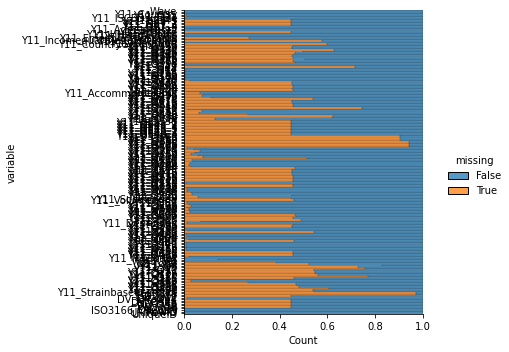

In [97]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=eqls_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Almost all feature columns contain missing values and the fraction of rows with missing data can be substantial.
As the visualisation shows there is a large amount of missingness within the 2007 and 2011 data combined.
This visualisation indicates that there is a **relationship** between missingness and its values, missing or non-missing.

Ok, let's try to become a bit more quantitative. We can calculate for every `RowID` and feature column the following information:
- percentage of missing values
- relative fraction of missing values (= number missing values / `Wave` for which this `RowID` is present)

In [98]:
# percentage of missing values and columns which have over 50% missingness
eqls_null_counts = eqls_df.isnull().sum() / len(eqls_df)
eqls_null_counts[eqls_null_counts>0.5]

Y11_Degurba                0.577848
Y11_Q33a                   0.599458
Y11_Q34a                   0.627110
Y11_Q35c                   0.507847
Y11_Q44                    0.716147
Y11_Q47e                   0.541958
Y11_Q52                    0.745641
Y11_Q53e                   0.623300
Y11_Q53f                   0.620777
Y11_Q55a                   0.906736
Y11_Q55b                   0.906459
Y11_Q55c                   0.905803
Y11_Q55d                   0.908629
Y11_Q56a                   0.942387
Y11_Q56b                   0.941832
Y11_Q56c                   0.942172
Y11_Q56d                   0.942765
Y11_Q25g                   0.516765
Y11_Q40b                   0.544456
Y11_Q8                     0.521156
Y11_Q9                     0.828283
Y11_Q10                    0.727135
Y11_Q11                    0.757348
Y11_Q12a                   0.545389
Y11_Q12b                   0.547105
Y11_Q12c                   0.546701
Y11_Q15                    0.560174
Y11_Q16                    0

In [99]:
# getting the proportion of null values for each wave
eqls_labels = eqls_df.drop(columns=['RowID', 'URIRowID', 'UniqueID'])

pd.set_option('display.max_rows', 100000)
prop_null_counts_per_wave = eqls_labels.groupby("Wave").apply(lambda x: x.isnull().sum()/len(x)).transpose()
[prop_null_counts_per_wave[(prop_null_counts_per_wave>0.5).any(1)]]

[Wave                            2         3
 Y11_Q67_1                1.000000  0.000000
 Y11_Q67_2                1.000000  0.000000
 Y11_Q67_3                1.000000  0.000000
 Y11_Q67_4                1.000000  0.000000
 Y11_Q67_5                1.000000  0.000000
 Y11_HHsize18plus         1.000000  0.000000
 Y11_Degurba              1.000000  0.233110
 Y11_Q33a                 1.000000  0.272367
 Y11_Q33b                 1.000000  0.011550
 Y11_Q33c                 1.000000  0.005867
 Y11_Q33d                 1.000000  0.005729
 Y11_Q34a                 1.000000  0.322601
 Y11_Q34b                 1.000000  0.091576
 Y11_Q34c                 1.000000  0.025094
 Y11_Q34d                 1.000000  0.010977
 Y11_Q35a                 1.000000  0.006508
 Y11_Q35b                 1.000000  0.009694
 Y11_Q35c                 1.000000  0.105945
 Y11_Q35d                 1.000000  0.011917
 Y11_Q35e                 1.000000  0.027179
 Y11_Q44                  0.722653  0.710835
 Y11_Q50a 

We can see that there are a large amount of completely blank columns in Wave 2 (2007-8) wave, indicating these variables were not present in the survey.
Because we want to make use of the additional variables we will use only Wave 3 data to be able to incorporate these variables.

In [100]:
eqls_2011_path = Path("data/UKDA-7724-csv/csv/eqls_2011.csv").resolve()
eqls_2011_df = pd.read_csv(eqls_2011_path)

eqls_2011_df.head()

,Wave,Y11_Country,Y11_Q31,Y11_Q32,Y11_ISCEDsimple,Y11_Q49,Y11_Q67_1,Y11_Q67_2,Y11_Q67_3,Y11_Q67_4,...,DV_Q54a,DV_Q54b,DV_Q55,DV_Q56,DV_Q8,DV_Q10,ISO3166_Country,RowID,URIRowID,UniqueID
0,3,15,NaN,0.0,4.0,1.0,1,1,1,2,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35635,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1189423
1,3,15,4.0,0.0,4.0,2.0,1,1,2,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35636,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1156013
2,3,15,4.0,0.0,3.0,2.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35637,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1030307
3,3,15,3.0,0.0,3.0,2.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35638,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1057215
4,3,15,4.0,0.0,4.0,3.0,2,1,1,1,...,3,3,0,0,4,4,https://www.iso.org/obp/ui/#iso:code:3166:IT,35639,https://api.ukdataservice.ac.uk/V1/datasets/eq...,AT1037718


In [101]:
eqls_2011_labels = eqls_2011_df.drop(columns=['RowID', 'URIRowID', 'UniqueID'])

prop_null_counts_wave_3 = eqls_2011_labels.groupby("Wave").apply(lambda x: x.isnull().sum()/len(x)).transpose()
[prop_null_counts_wave_3[(prop_null_counts_wave_3>0.5).any(1)]]

[Wave                            3
 Y11_Q44                  0.710835
 Y11_Q52                  0.537927
 Y11_Q55a                 0.830576
 Y11_Q55b                 0.830072
 Y11_Q55c                 0.828880
 Y11_Q55d                 0.834013
 Y11_Q56a                 0.895339
 Y11_Q56b                 0.894330
 Y11_Q56c                 0.894949
 Y11_Q56d                 0.896026
 Y11_Q40b                 0.557980
 Y11_Q7                   0.565955
 Y11_Q9                   0.688056
 Y11_Q10                  0.504308
 Y11_Q11                  0.559194
 Y11_Q12a                 0.558828
 Y11_Q12b                 0.560248
 Y11_Q12c                 0.559744
 Y11_Q15                  0.574113
 Y11_Q16                  0.580324
 Y11_Strainbasedconflict  0.555963
 Y11_Q7a                  0.558163
 Y11_Q7b                  0.973646
 DV_Q7                    0.974081]

In [102]:
eqls_2011_labels.apply(lambda x: x.isnull().sum()/len(x))

Wave                             0.000000
Y11_Country                      0.000000
Y11_Q31                          0.005592
Y11_Q32                          0.005179
Y11_ISCEDsimple                  0.002085
Y11_Q49                          0.002177
Y11_Q67_1                        0.000000
Y11_Q67_2                        0.000000
Y11_Q67_3                        0.000000
Y11_Q67_4                        0.000000
Y11_Q67_5                        0.000000
Y11_Agecategory                  0.000000
Y11_HH2a                         0.000000
Y11_HHsize                       0.000000
Y11_HHsize18plus                 0.000000
Y11_HHstructure                  0.000000
Y11_Education                    0.000000
Y11_EmploymentStatus             0.000000
Y11_Incomequartiles_percapita    0.247846
Y11_RuralUrban                   0.002177
Y11_Degurba                      0.233110
Y11_CountryGroupEU28             0.000000
Y11_Q33a                         0.272367
Y11_Q33b                         0

We can see there are less missing data in the variables in the 2011 data. When looking at the [metadata](http://doc.ukdataservice.ac.uk/doc/7724/mrdoc/pdf/7724_eqls_2007-2011_user_guide_v2.pdf) available for these columns,
we can see that large amounts of missing data is available on questions such as:
- Are you limited in your daily activities by this physical or mental health problem/illness/disability?
- How much time spent on travelling to work/study?
- Difficult to use child care/long term care because of cost/availability/access/quality of care?
- How satisfied with present job?
- How many hours do you/your partner work?
- How likely to lose/find a similar salaried job in 6 months?
- Work-life balance conflict?
- Worked at an additional paid?
- Total number of working hours?

Many of these variables are derived (see Derived variables section in the metadata) and therefore inherit the missingness from the other data.
We can deal with missing data in multiple ways. one strategy is to impute them.

 Data pipelines allow one to transform data from one representation
to another through a series of steps. Pipelines allow one to apply and chain intermediate steps of transform to our data
For example, one can fill missing values, pass the output to cross
validation and grid search and then fit the model in series of steps chained together where the output of one is the input to another.

In [103]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

eqls_2011_df_impute = eqls_2011_df.copy()
cols_with_missing = (col for col in eqls_2011_df_impute.columns
                                 if eqls_2011_df_impute[col].isnull().any())
for col in cols_with_missing:
    eqls_2011_df_impute[col + '_was_missing'] = eqls_2011_df_impute[col].isnull()

eqls_2011_df_imputed = DataFrameImputer().fit_transform(eqls_2011_df_impute)

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


We can see the imputed values (most common feature for columns with `dtype` type and the average value for other "type" columns.

In [104]:
eqls_2011_df_imputed.head()


,Wave,Y11_Country,Y11_Q31,Y11_Q32,Y11_ISCEDsimple,Y11_Q49,Y11_Q67_1,Y11_Q67_2,Y11_Q67_3,Y11_Q67_4,...,Y11_Q38_was_missing,Y11_Q39a_was_missing,Y11_Q39b_was_missing,Y11_Q39c_was_missing,Y11_Q39d_was_missing,Y11_Strainbasedconflict_was_missing,Y11_Q7a_was_missing,Y11_Q7b_was_missing,DV_Q7_was_missing,DV_Q43Q44_was_missing
0,3,15,1.880969,0.0,4.0,1.0,1,1,1,2,...,True,False,False,False,True,False,False,True,True,False
1,3,15,4.000000,0.0,4.0,2.0,1,1,2,1,...,True,False,False,False,True,False,False,True,True,False
2,3,15,4.000000,0.0,3.0,2.0,2,1,1,1,...,True,False,False,False,True,False,False,True,True,False
3,3,15,3.000000,0.0,3.0,2.0,2,1,1,1,...,True,False,False,False,False,True,True,True,True,False
4,3,15,4.000000,0.0,4.0,3.0,2,1,1,1,...,True,False,False,False,False,False,False,True,True,False


### Example (Comparing All Solutions)

We will see am example predicting the self reported health outcome (feature label: '`Y11_Q42`') from the EQLS data.
We use a random forest regressor to predict the self reported health outcome.
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms.

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

eqls_2011_df_target_nona = eqls_2011_df[eqls_2011_df['Y11_Q42'].notna()]
eqls_2011_target = eqls_2011_df_target_nona.Y11_Q42
eqls_2011_predictors = eqls_2011_df_target_nona.drop(['Y11_Q42'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
eqls_2011_numeric_predictors = eqls_2011_predictors.select_dtypes(exclude=['object'])



X_train, X_test, y_train, y_test = train_test_split(eqls_2011_numeric_predictors,
                                                    eqls_2011_target,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)

def random_forest_score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

#### Get Model Score from Dropping Columns with Missing Values

In [106]:
cols_with_missing = [col for col in X_train.columns
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(random_forest_score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
0.680240281603918


#### Get Model Score from Imputation


In [107]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(random_forest_score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))


Mean Absolute Error from Imputation:
0.4557667584940312


#### Get Score from Imputation with Extra Columns Showing What Was Imputed


In [108]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(random_forest_score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


Mean Absolute Error from Imputation while Track What Was Imputed:
0.4550987144168962


As is common, imputing missing values allowed us to improve our model compared to dropping those columns.
We got an additional boost by tracking what values had been imputed.

## Modelling - Logistic Regression
Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification.
It is easy to implement and can be used as the baseline for any binary classification problem.
Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the
relationship between one dependent binary variable and independent variables.

#### Predict variable (desired target):

`y` —  In general, your health is …? (Y11_Q42)

The health column of the dataset has many categories and we need to reduce the categories for a better modelling.
The health column has the following categories:

In [109]:
eqls_2011_df_target_nona['Y11_Q42'].unique()

array([2., 1., 3., 4., 5.])

The labels in our current target variable are as follows:
- `"1"` (Label = Very good)
- `"2"` (Label = Good)
- `"3"` (Label = Fair)
- `"4"` (Label = Bad)
- `"5"` (Label = Very bad) together.

Let's create an updated variable that is binary (i.e. either a 1 or a 0 such that `"1"`, means “Good”, `"0"` means “Bad”).
Lets assign the `"1"`, `"2"`, `"3"` to the value `"1"`, and likewise, `"4"` and `"5"` to the value of `"0"`.

In [110]:
eqls_2011_df_target_nona['Y11_Q42_binary'] = eqls_2011_df_target_nona.Y11_Q42.apply(lambda x: 1 if float(x) <= 3 else 0)

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
eqls_2011_df_target_nona[['Y11_Q42_binary','Y11_Q42']].head()

,Y11_Q42_binary,Y11_Q42
0,1,2.0
1,1,1.0
2,1,2.0
3,1,1.0
4,1,3.0


We can see that the column `Y11_Q42_binary` contains `1` where the value is `[1, 2, 3]` in the column `Y11_Q42`.

In [118]:
# dropping the ID's which are not predictor variables
feature_2011_columns = eqls_2011_df_target_nona.drop(columns=['RowID', 'URIRowID', 'UniqueID'])

In [133]:
from sklearn.linear_model import LogisticRegression

eqls_2011_target = feature_2011_columns.Y11_Q42_binary
eqls_2011_predictors = feature_2011_columns.drop(['Y11_Q42_binary','Y11_Q42'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
eqls_2011_numeric_predictors = eqls_2011_predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(eqls_2011_numeric_predictors,
                                                    eqls_2011_target,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)

def logistic_regression_score_dataset(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

We remove the columns `'Y11_Q42'` as our new target variable (`Y11_Q42_binary`) are derived from this
Lets compare the results with the different imputation methods illustrated earlier.

In [122]:
cols_with_missing = [col for col in X_train.columns
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(logistic_regression_score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
0.10567799204162841


/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Get Logistic Regression Score from Imputation


In [123]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(logistic_regression_score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))


Mean Absolute Error from Imputation:
0.06221303948576676


/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Get Logistic Regression Score from Imputation with Extra Columns Showing What Was Imputed


In [146]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(logistic_regression_score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
0.09023668639053255


/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We can see that the imputation (without tracking columns) significantly improves the result of the logistic regression.
We can diagnose our results using a Confusion Matrix.

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm.
The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [147]:
# import the metrics class
from sklearn import metrics

def get_prediction(X_train, X_test, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds

y_pred = get_prediction(imputed_X_train, imputed_X_test, y_train)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 44,  34],
       [ 27, 571]])

Here, you can see the confusion matrix in the form of the array object.
The dimension of this matrix is 2*2 because this model is binary classification.
You have two classes 0 representing "poor health" and 1, representing "good health".
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

In the output, `44` and `571` are actual predictions (`44` is the number of true "poor health" predictions, and `571` is the number of ture "good health" predictions).
`34` and `27` are incorrect predictions (`34` is the number of "poor health" predictions predicted incorrectly as "good health",
and `310` is the number of false "good health" predictions).


<div class="alert alert-block alert-warning"> This model overly predicts "good health" outcomes, and may benefit from oversampling
surveyed respondents which self-report "poor health". </code> </div>

Accuracy: 0.9097633136094675
Precision: 0.943801652892562
Recall: 0.9548494983277592


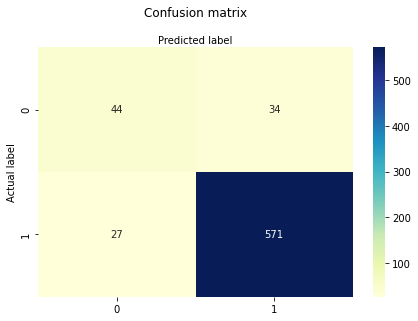

In [148]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


## Model Evaluation
We can see that the logistic regression model does well when most of the predictions are "good health"

### Modelling just the UK

Here we want to select the UK from the data and see if we can build a country-specific logistic regression model.

![country-metadata]("./assets/metadata-country.png")

The country code for selecting the UK is `27.0`

In [154]:
feature_2011_UK_columns = eqls_2011_df_target_nona.drop(columns=['RowID', 'URIRowID', 'UniqueID'])

feature_2011_UK_columns = feature_2011_UK_columns.loc[feature_2011_UK_columns['Y11_Country'] == 27.0]

eqls_2011_UK_target = feature_2011_UK_columns.Y11_Q42_binary
eqls_2011_UK_predictors = feature_2011_UK_columns.drop(['Y11_Q42_binary','Y11_Q42'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
eqls_2011_UK_numeric_predictors = eqls_2011_UK_predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(eqls_2011_UK_numeric_predictors,
                                                    eqls_2011_UK_target,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error for the UK from Imputation:")
print(logistic_regression_score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error for the UK from Imputation:
0.09023668639053255


/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We can see that Logistic regression performs using only UK data performs similar to the total country model, suggesting that country is not a large determinant of why
individuals self-reported health. Let's retrieve this model and test it on two additional country data.

In [155]:
def get_fitted_model(X_train, y_train):
    model = LogisticRegression()
    return model.fit(X_train, y_train)

logistic_regression_model_UK = get_fitted_model(imputed_X_train, y_train)

/Users/clast/Documents/2021_projects/rds-course/.venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Now, Lets select two other countries from the dataset to test the transferability of this model.

In [173]:
feature_2011_other_countries_columns = eqls_2011_df_target_nona.drop(columns=['RowID', 'URIRowID', 'UniqueID'])
# Selecting data for the Netherlands
feature_2011_NL_columns = feature_2011_other_countries_columns.loc[feature_2011_other_countries_columns['Y11_Country'] == 20.0]
# Selecting data for Romania
feature_2011_RO_columns = feature_2011_other_countries_columns.loc[feature_2011_other_countries_columns['Y11_Country'] == 23.0]


def create_test_data(df):
    df_target = df.Y11_Q42_binary
    df_predictors = df.drop(['Y11_Q42_binary','Y11_Q42'], axis=1)
    df_numeric_predictors = df_predictors.select_dtypes(exclude=['object'])
    X_train, X_test, y_train, y_test = train_test_split(df_numeric_predictors,
                                                        df_target,
                                                        train_size=0.7,
                                                        test_size=0.3,
                                                        random_state=0)
    return X_test, y_test

In [174]:
X_test_NL, y_test_NL = create_test_data(feature_2011_NL_columns)
X_test_RO, y_test_RO = create_test_data(feature_2011_RO_columns)

my_imputer = SimpleImputer()
imputed_X_test_RO = my_imputer.fit_transform(X_test_RO)
imputed_X_test_NL = my_imputer.fit_transform(X_test_NL)

y_pred_NL = logistic_regression_model_UK.predict(imputed_X_test_NL)

y_pred_RO = logistic_regression_model_UK.predict(imputed_X_test_RO)

#Getting the MAE for both countries using the UK model
print("Mean Absolute Error for Netherlands from Imputation:")
print(mean_absolute_error(y_test_NL, y_pred_NL))
print("Mean Absolute Error for Romania from Imputation:")
print(mean_absolute_error(y_test_RO, y_pred_RO))

Mean Absolute Error for Netherlands from Imputation:
0.11551155115511551
Mean Absolute Error for Romania from Imputation:
0.16666666666666666


The above error statistics from the `Netherlands` and the `Romania` test set. To repeat, these are predictions are using the UK model to predict
self-reported health on test sets for Netherlands and Romania. The MAE for the predictions on Netherlands respondents is
higher than the prediction error on the UK test dataset. The Romania model performs even worse than the Netherlands predictions,
indicating that the feature importances in the UK model do not best model the features which are important in predicting
self-reported health in Romania.

Accuracy: 0.8844884488448845
Precision: 0.8969072164948454
Recall: 0.981203007518797


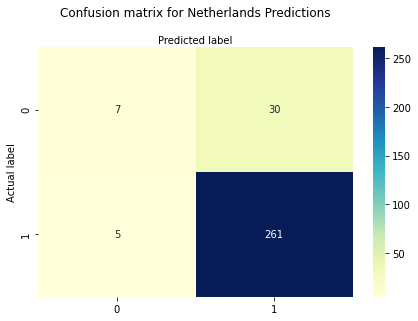

In [179]:
cnf_matrix_NL = metrics.confusion_matrix(y_test_NL, y_pred_NL)
cnf_matrix_NL

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NL), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Netherlands Predictions', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test_NL, y_pred_NL))
print("Precision:",metrics.precision_score(y_test_NL, y_pred_NL))
print("Recall:",metrics.recall_score(y_test_NL, y_pred_NL))


Accuracy: 0.8333333333333334
Precision: 0.8321513002364066
Recall: 0.9832402234636871


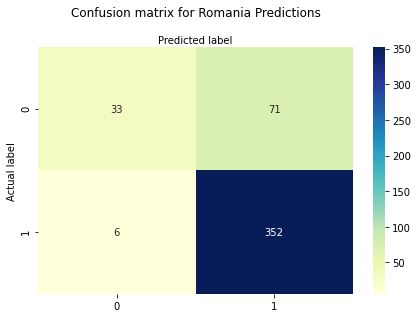

In [178]:
cnf_matrix_RO = metrics.confusion_matrix(y_test_RO, y_pred_RO)
cnf_matrix_RO

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RO), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Romania Predictions', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test_RO, y_pred_RO))
print("Precision:",metrics.precision_score(y_test_RO, y_pred_RO))
print("Recall:",metrics.recall_score(y_test_RO, y_pred_RO))

## References
European Foundation for the Improvement of Living and Working Conditions, (2015). European Quality of Life Time Series,
2007 and 2011: Open Access. UK Data Service. [data collection]. http://doi.org/10.5255/UKDA-SN-7724-1

